In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [10]:
some_digit = X[1]

In [11]:
svm_clf.predict([X[1]])

array(['0'], dtype=object)

In [12]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 9.31, -0.29,  6.14,  7.21,  0.71,  8.28,  3.8 ,  1.77,  2.77,
         5.11]])

# Decision Tree

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [15]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y_iris = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf, 
    out_file="iris_tree.dot", 
    feature_names=["petal length (cm)", "petal width (cm)"], 
    class_names=iris.target_names, 
    rounded=True, 
    filled=True
)

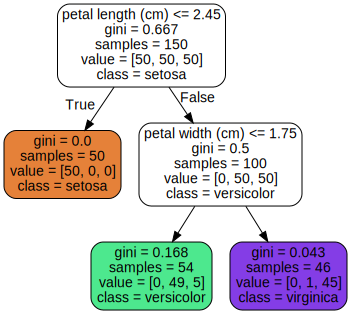

In [17]:
from graphviz import Source
Source.from_file("iris_tree.dot")

의사결정트리는 깊어질수록 복잡해지므로 오버피팅될 확률이 높아진다.

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy') 
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [19]:
export_graphviz(
    tree_clf, 
    out_file="iris_tree.dot", 
    feature_names=["petal length (cm)", "petal width (cm)"], 
    class_names=iris.target_names, 
    rounded=True, 
    filled=True
)

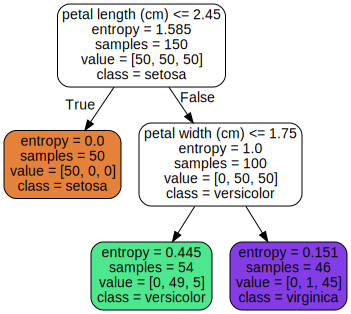

In [20]:
from graphviz import Source
Source.from_file("iris_tree.dot")

In [21]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [22]:
tree_clf.predict([[5, 1.5]])

array([1])

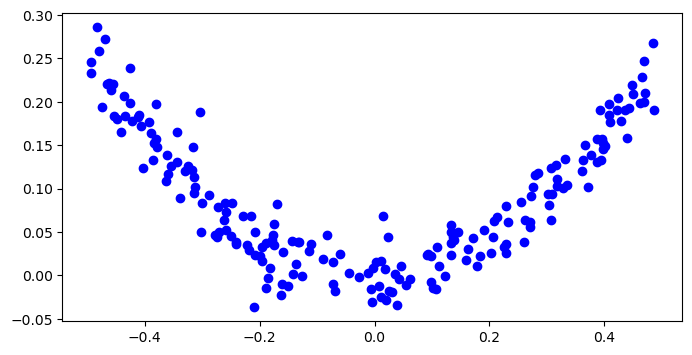

In [23]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

plt.figure(figsize=(8, 4))
plt.plot(X_quad, y_quad, marker='o',linestyle='',color='blue')
plt.show()

In [24]:
tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

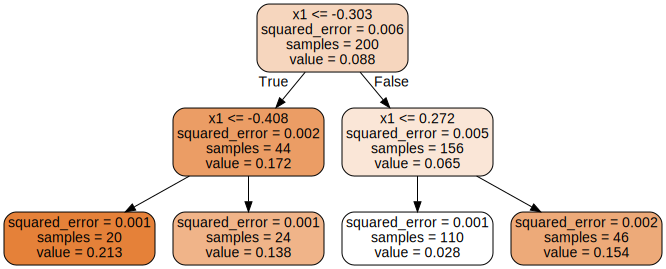

In [25]:
export_graphviz(tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

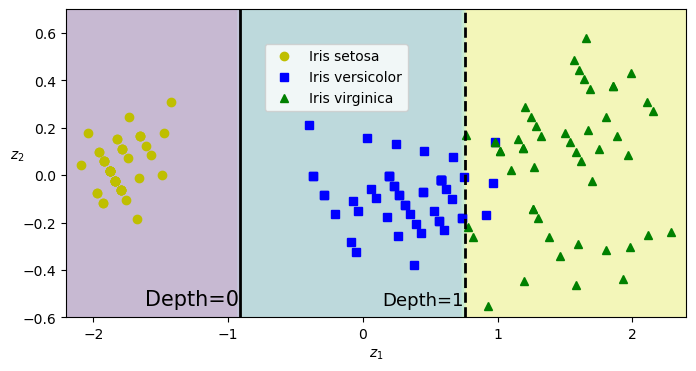

In [27]:
plt.figure(figsize=(8,4))
axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                             np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]

y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
            X_iris_rotated[:, 1][y_iris == idx],
            style, label=f"Iris {name}")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1", horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

PCA는 데이터를 좌표평면에서 회전, 차원 축소용으로 사용

회전을 하므로써 모델을 단순화 시킬 수 있다.

선형관계에 있는 것을 전제로 한다.

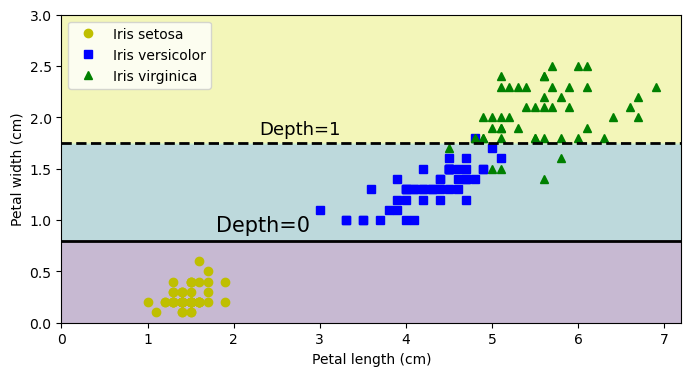

In [28]:
tree_clf_tweaked=DecisionTreeClassifier(max_depth=2,random_state=40) 
tree_clf_tweaked.fit(X_iris, y_iris)

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

plt.figure(figsize=(8,4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape) 
plt.contourf(lengths, widths, y_pred, alpha=0.3)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))): 
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
    style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15) 
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13) 
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

# Support Vector Machine
1. Over fitting이 잘 안됨
2. Binary classfier
3. 값에 영향을 크게 받기때문에 표준화를 꼭 해주도록 한다.

모델을 선택할 때 고려하는 요인 -> 그리드로 여러 모델을 돌려 가장 높게 나온 것을 선택

표준화 vs 정규화

이진분류 밖에 안되는 문제를 해결하기 위해 나온 것이 ovo, ovr

In [29]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = make_pipeline(
      PolynomialFeatures(degree=3), 
      StandardScaler(), 
      LinearSVC(C=10, max_iter=10_000, random_state=42)
)

polynomial_svm_clf.fit(X, y)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

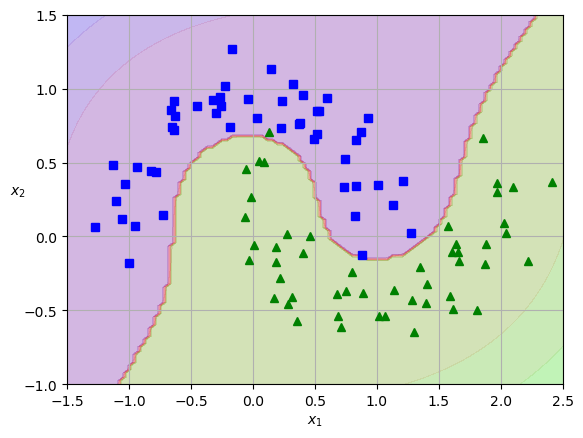

In [30]:
def plot_dataset(X,y,axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") 
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") 
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape) 
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) 
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5]) 
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

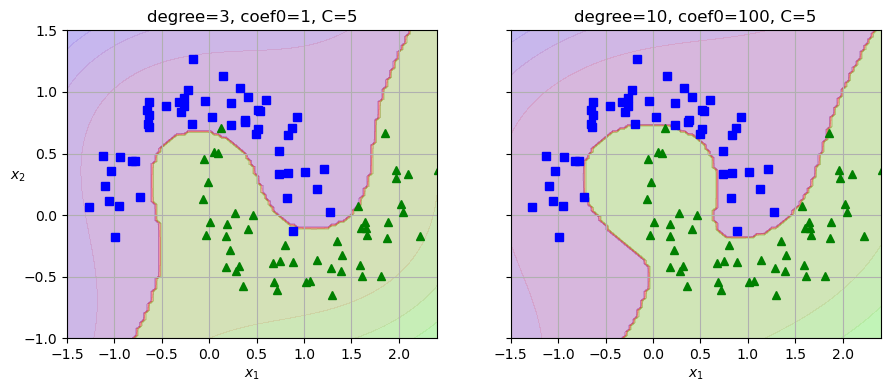

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
) 

poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)

poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5]) 
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5]) 
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5]) 
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

- 테스트 정확도가 높은 것을 찾는 것이 1순위

In [32]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=100, 
    n_jobs=-1, 
    random_state=42
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

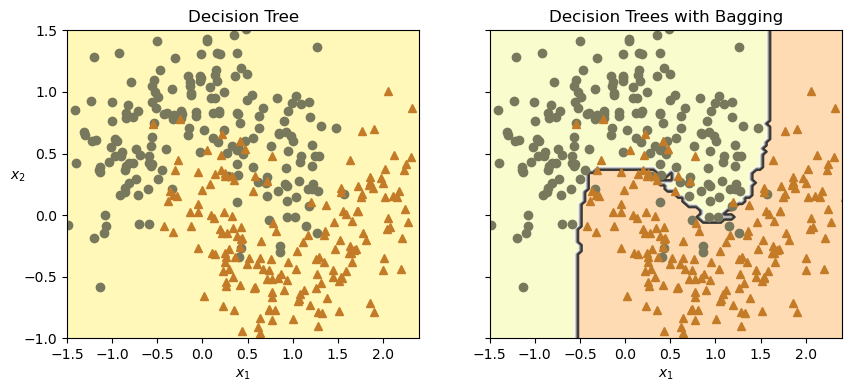

In [34]:
def plot_decision_boundary(clf, X, y, alpha=1.0): 
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100), 
        np.linspace(axes[2], axes[3], 100)
    )
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia') 
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha) 
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], 
                X[:, 1][y == idx],
                color=colors[idx], 
                marker=markers[idx], 
                linestyle="none"
        ) 
    plt.axis(axes)
    plt.xlabel(r"$x_1$") 
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True) 
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train) 
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train) 
plt.title("Decision Trees with Bagging") 
plt.ylabel("")
plt.show()

In [35]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=42
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [36]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

In [37]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [38]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500, 
    max_leaf_nodes=16,
    n_jobs=-1, 
    random_state=42
)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [39]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16), 
    n_estimators=500, 
    n_jobs=-1, 
    random_state=42
)
bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)
np.all(y_pred_bag == y_pred_rf)

True

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier(
    n_estimators=500, 
    max_leaf_nodes=16,
    n_jobs=-1, 
)

extra_clf.fit(X_train, y_train)
y_pred_extra = extra_clf.predict(X_test)

accuracy_score(y_test, y_pred_extra)

0.92

In [41]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


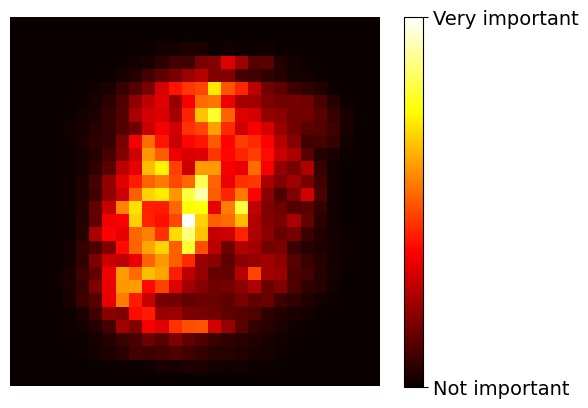

In [42]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False) 
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) 
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28) 
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
rnd_clf.feature_importances_.max()]) 

cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()

In [43]:
# 그레디언트 부스팅 쓸 것 - XGBoost

Text(0.5, 0, '$x_1$')

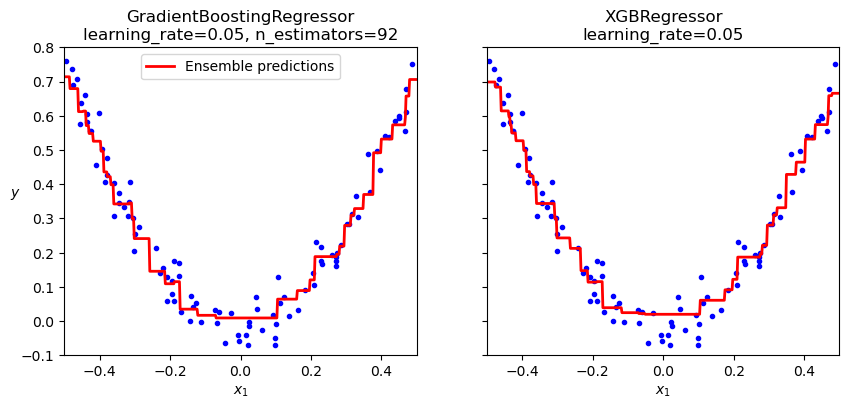

In [50]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

def plot_predictions(regressors,X,y,axes,style,label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label) 
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

gbrt_best = GradientBoostingRegressor(
    max_depth=2, 
    learning_rate=0.05, 
    n_estimators=500, 
    n_iter_no_change=10, 
    random_state=42
)
gbrt_best.fit(X, y)

xgb_reg = xgboost.XGBRegressor(
    max_depth=2, 
    learning_rate=0.05, 
    n_estimators=92,
    random_state=42
)
xgb_reg.fit(X, y)

fig, axes = plt.subplots(
    ncols=2, 
    figsize=(10, 4), 
    sharey=True
)

plt.sca(axes[0])
plot_predictions(
    [gbrt_best], 
    X, 
    y, 
    axes=[-0.5, 0.5, -0.1, 0.8], 
    style="r-",
    label="Ensemble predictions"
) 

plt.title(f"GradientBoostingRegressor\nlearning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions(
    [xgb_reg], 
    X, 
    y, 
    axes=[-0.5, 0.5, -0.1, 0.8], 
    style="r-"
) 

plt.title(f"XGBRegressor\nlearning_rate={xgb_reg.learning_rate}") 
plt.xlabel("$x_1$")